In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DLDS_231106072258.csv")

In [3]:
df.head()

,no,kode_kabupaten,nama_kabupaten,tingkat_pendidikan,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember,satuan,tahun
0,1,3215,KARAWANG,TAMAT SD,160,173,141,0,5,0,32,14,15,28,34,36,ORANG,2020
1,2,3215,KARAWANG,SMP,232,251,189,0,15,98,95,65,169,106,104,136,ORANG,2020
2,3,3215,KARAWANG,SMA,"3,231","1,422","1,889",0,320,"3,899","1,905","2,325","11,552","4,710","4,016","2,782",ORANG,2020
3,4,3215,KARAWANG,DIPLOMA,55,2,0,0,0,0,0,0,212,121,122,75,ORANG,2020
4,5,3215,KARAWANG,SARJANA,22,1,0,0,3,0,0,0,545,363,277,178,ORANG,2020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   no                  5 non-null      int64 
 1   kode_kabupaten      5 non-null      int64 
 2   nama_kabupaten      5 non-null      object
 3   tingkat_pendidikan  5 non-null      object
 4   januari             5 non-null      object
 5   februari            5 non-null      object
 6   maret               5 non-null      object
 7   april               5 non-null      int64 
 8   mei                 5 non-null      int64 
 9   juni                5 non-null      object
 10  juli                5 non-null      object
 11  agustus             5 non-null      object
 12  september           5 non-null      object
 13  oktober             5 non-null      object
 14  november            5 non-null      object
 15  desember            5 non-null      object
 16  satuan              5 non-null

In [5]:
print(df.dtypes)

no                     int64
kode_kabupaten         int64
nama_kabupaten        object
tingkat_pendidikan    object
januari               object
februari              object
maret                 object
april                  int64
mei                    int64
juni                  object
juli                  object
agustus               object
september             object
oktober               object
november              object
desember              object
satuan                object
tahun                  int64
dtype: object


In [6]:
# Kolom-kolom yang perlu diubah tipe data
columns_to_convert = ['januari', 'februari', 'maret', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']

for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '', regex=True).astype('int64')

In [7]:
print(df.dtypes)

no                     int64
kode_kabupaten         int64
nama_kabupaten        object
tingkat_pendidikan    object
januari                int64
februari               int64
maret                  int64
april                  int64
mei                    int64
juni                   int64
juli                   int64
agustus                int64
september              int64
oktober                int64
november               int64
desember               int64
satuan                object
tahun                  int64
dtype: object


In [10]:
df['total_pencari_kerja'] = df['januari']+df['februari']+df['maret']+df['april']+df['mei']+df['juni']+df['juli']+df['agustus']+df['september']+df['oktober']+df['november']+df['desember']

In [11]:
df.head()

,no,kode_kabupaten,nama_kabupaten,tingkat_pendidikan,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember,satuan,tahun,total_pencari_kerja
0,1,3215,KARAWANG,TAMAT SD,160,173,141,0,5,0,32,14,15,28,34,36,ORANG,2020,638
1,2,3215,KARAWANG,SMP,232,251,189,0,15,98,95,65,169,106,104,136,ORANG,2020,1460
2,3,3215,KARAWANG,SMA,3231,1422,1889,0,320,3899,1905,2325,11552,4710,4016,2782,ORANG,2020,38051
3,4,3215,KARAWANG,DIPLOMA,55,2,0,0,0,0,0,0,212,121,122,75,ORANG,2020,587
4,5,3215,KARAWANG,SARJANA,22,1,0,0,3,0,0,0,545,363,277,178,ORANG,2020,1389


In [12]:
df['total_pencari_kerja'].sum()

42125

In [13]:
df['total_pencari_kerja'].mean()

8425.0

In [8]:
# Menambahkan kolom baru
df['total_pencari_kerja'] = df[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].sum(axis=1)


**Pencari Kerja Berdasarkan Tingkat Pendidikan**

In [9]:
total_pencari_kerja_per_pendidikan = df.groupby('tingkat_pendidikan')['total_pencari_kerja'].sum()
print(total_pencari_kerja_per_pendidikan)

tingkat_pendidikan
DIPLOMA       587
SARJANA      1389
SMA         38051
SMP          1460
TAMAT SD      638
Name: total_pencari_kerja, dtype: int64


**Tingkat Pencari Kerja Priode Januari-Mei**

In [10]:
sorted_df = df.sort_values(by=['januari', 'februari', 'maret', 'april', 'mei'])

result_df = sorted_df[['tingkat_pendidikan', 'januari', 'februari', 'maret', 'april', 'mei']]
print(result_df)

  tingkat_pendidikan  januari  februari  maret  april  mei
4            SARJANA       22         1      0      0    3
3            DIPLOMA       55         2      0      0    0
0           TAMAT SD      160       173    141      0    5
1                SMP      232       251    189      0   15
2                SMA     3231      1422   1889      0  320


**Rata-Rata Pencari Kerja Selama 1 tahun**

In [11]:
# kolom baru
df['rata_rata_1_tahun'] = df[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']].mean(axis=1) / 12

In [12]:
result_df = df.groupby(['tahun', 'tingkat_pendidikan'])[['rata_rata_1_tahun', 'total_pencari_kerja']].sum()

print(result_df)


                          rata_rata_1_tahun  total_pencari_kerja
tahun tingkat_pendidikan                                        
2020  DIPLOMA                      4.076389                  587
      SARJANA                      9.645833                 1389
      SMA                        264.243056                38051
      SMP                         10.138889                 1460
      TAMAT SD                     4.430556                  638


**Persentase Pencari Kerja Berdasarkan Tingkat Pendidikan**

In [15]:
# Menghitung persentase pencari kerja berdasarkan tingkat pendidikan
persentase_pencari_kerja = (df.groupby('tingkat_pendidikan')['total_pencari_kerja'].sum() / df['total_pencari_kerja'].sum()) * 100

# Menampilkan persentase pencari kerja
print(persentase_pencari_kerja)

tingkat_pendidikan
DIPLOMA      1.393472
SARJANA      3.297329
SMA         90.328783
SMP          3.465875
TAMAT SD     1.514540
Name: total_pencari_kerja, dtype: float64


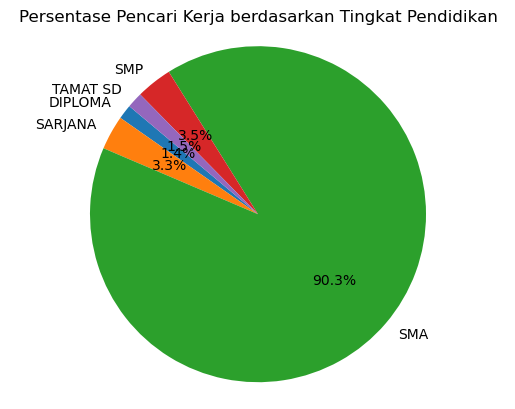

In [18]:
# Menghitung persentase pencari kerja berdasarkan tingkat pendidikan
persentase_pencari_kerja = (df.groupby('tingkat_pendidikan')['total_pencari_kerja'].sum() / df['total_pencari_kerja'].sum()) * 100


plt.pie(persentase_pencari_kerja, labels=persentase_pencari_kerja.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pencari Kerja berdasarkan Tingkat Pendidikan')
plt.axis('equal')
plt.show()